# 1. Preparing data

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Fuel prices

In [13]:
jun19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-06-2019.csv')
jul19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-07-2019.csv')
aug19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-08-2019.csv')
sep19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-09-2019.csv')
oct19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-10-2019.csv')
nov19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-11-2019.csv')
dec19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-12-2019.csv')

jan20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-01-2020.csv')
feb20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-02-2020.csv')
mar20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-03-2020.csv')
apr20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-04-2020.csv')
may20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-05-2020.csv')
jun20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-06-2020.csv')
jul20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-07-2020.csv')
aug20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-08-2020.csv')

FileNotFoundError: [Errno 2] File data/fuelwatch/FuelWatchRetail-06-2019.csv does not exist: 'data/fuelwatch/FuelWatchRetail-06-2019.csv'

In [3]:
fuel_prices_df = pd.concat([jun19, jul19, aug19, sep19, oct19, nov19, dec19, jan20, feb20, mar20, apr20, may20, jun20, jul20, aug20])

NameError: name 'jun19' is not defined

In [4]:
fuel_prices_df.tail()

NameError: name 'fuel_prices_df' is not defined

In [5]:
fuel_prices_df['AREA_DESCRIPTION'].unique().tolist()[:5]

NameError: name 'fuel_prices_df' is not defined

In [6]:
# Get only Location = Armadale prices
mask = (fuel_prices_df.loc[:, 'LOCATION'] == 'ARMADALE') & (fuel_prices_df.loc[:, 'PRODUCT_DESCRIPTION'] == 'ULP')
fuel_prices_df_sor = fuel_prices_df[mask]

NameError: name 'fuel_prices_df' is not defined

In [7]:
# Change the dates to datetime format
fuel_prices_df_sor.loc[:, 'PUBLISH_DATE'] = pd.to_datetime(fuel_prices_df_sor.loc[:, 'PUBLISH_DATE'], format='%d/%m/%Y')

NameError: name 'fuel_prices_df_sor' is not defined

In [8]:
fuel_prices_df_sor.head()

NameError: name 'fuel_prices_df_sor' is not defined

In [9]:
fuel_prices_df_sor_daily_mean = fuel_prices_df_sor.groupby('PUBLISH_DATE')['PRODUCT_PRICE'].mean().reset_index()
fuel_prices_df_sor_daily_mean

NameError: name 'fuel_prices_df_sor' is not defined

In [10]:
fuel_prices_df_sor_daily_min = fuel_prices_df_sor.groupby('PUBLISH_DATE')['PRODUCT_PRICE'].min().reset_index()
fuel_prices_df_sor_daily_min

NameError: name 'fuel_prices_df_sor' is not defined

In [11]:
sns.lineplot(x='PUBLISH_DATE', y='PRODUCT_PRICE', data=fuel_prices_df_sor_daily_mean)
sns.lineplot(x='PUBLISH_DATE', y='PRODUCT_PRICE', data=fuel_prices_df_sor_daily_min)
plt.xticks(rotation=45)

NameError: name 'fuel_prices_df_sor_daily_mean' is not defined

In [258]:
fuel_prices_df_sor_daily_min.rename(columns={'PUBLISH_DATE':'Date' , 'PRODUCT_PRICE':'Fuel_price'}, inplace=True)

## Oil prices

In [259]:
oil = pd.read_csv('data/Cushing_OK_WTI_Spot_Price_FOB.csv')

In [260]:
oil.head()

,Date,Price
0,05/22/2020,33.25
1,05/21/2020,33.91
2,05/20/2020,33.52
3,05/19/2020,32.36
4,05/18/2020,31.83


In [261]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    798 non-null    object 
 1   Price   798 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.6+ KB


In [262]:
oil.rename(columns={'Price':'Oil_price'}, inplace=True)

In [263]:
# Change the dates to datetime format
oil.loc[:, 'Date'] = pd.to_datetime(oil.loc[:, 'Date'], format='%m/%d/%Y')

In [264]:
mask = oil['Date'] > np.datetime64('2019-05-01')
oil_df = oil[mask]
oil_df

,Date,Oil_price
0,2020-05-22,33.25
1,2020-05-21,33.91
2,2020-05-20,33.52
3,2020-05-19,32.36
4,2020-05-18,31.83
...,...,...
261,2019-05-08,62.13
262,2019-05-07,61.41
263,2019-05-06,62.30
264,2019-05-03,61.98


(array([737180., 737241., 737303., 737364., 737425., 737485., 737546.]),
 <a list of 7 Text major ticklabel objects>)

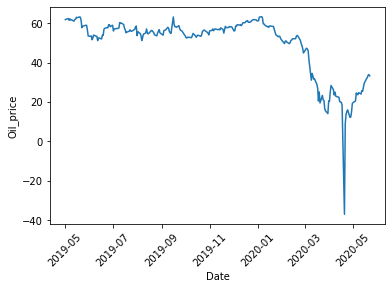

In [265]:
sns.lineplot(x='Date', y='Oil_price', data=oil_df)
plt.xticks(rotation=45)

(array([737180., 737241., 737303., 737364., 737425., 737485., 737546.]),
 <a list of 7 Text major ticklabel objects>)

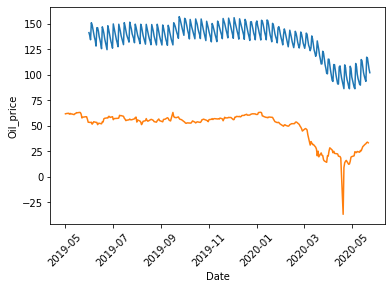

In [266]:
sns.lineplot(x='PUBLISH_DATE', y='PRODUCT_PRICE', data=fuel_prices_df_sor_daily_mean)
sns.lineplot(x='Date', y='Oil_price', data=oil_df)
plt.xticks(rotation=45)

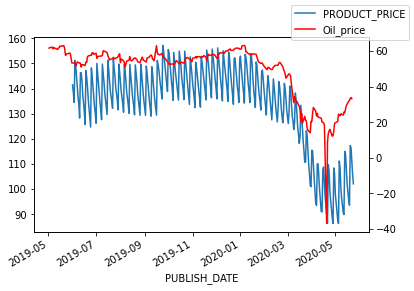

In [267]:
ax = fuel_prices_df_sor_daily_mean.plot(x="PUBLISH_DATE", y="PRODUCT_PRICE", legend=False)
ax2 = ax.twinx()
oil_df.plot(x="Date", y="Oil_price", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

## Exchange rate

**Load AUD vs USD**

In [268]:
df_usd_aud = pd.read_csv('data/AUD_USD Historical Data.csv')
df_usd_aud.head(10)

,Date,Price,Open,High,Low,Change %
0,"May 22, 2020",0.6536,0.6565,0.6578,0.6506,-0.44%
1,"May 21, 2020",0.6565,0.6597,0.6600,0.6548,-0.50%
2,"May 20, 2020",0.6598,0.6538,0.6618,0.6525,0.93%
3,"May 19, 2020",0.6537,0.6523,0.6586,0.6510,0.20%
4,"May 18, 2020",0.6524,0.6425,0.6528,0.6409,1.70%
5,"May 15, 2020",0.6415,0.6462,0.6475,0.6401,-0.73%
6,"May 14, 2020",0.6462,0.6452,0.6469,0.6403,0.11%
7,"May 13, 2020",0.6455,0.6473,0.6525,0.6437,-0.23%
8,"May 12, 2020",0.6470,0.6490,0.6537,0.6431,-0.30%
9,"May 11, 2020",0.6489,0.6529,0.6563,0.6456,-0.62%


In [269]:
df_usd_aud.tail()

,Date,Price,Open,High,Low,Change %
359,"Jan 07, 2019",0.7148,0.7108,0.7151,0.7108,0.49%
360,"Jan 04, 2019",0.7113,0.7006,0.7125,0.6992,1.53%
361,"Jan 03, 2019",0.7006,0.6985,0.7020,0.6744,0.30%
362,"Jan 02, 2019",0.6985,0.7053,0.7054,0.6980,-0.96%
363,"Jan 01, 2019",0.7053,0.7048,0.7067,0.7045,0.01%


In [270]:
df_usd_aud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      364 non-null    object 
 1   Price     364 non-null    float64
 2   Open      364 non-null    float64
 3   High      364 non-null    float64
 4   Low       364 non-null    float64
 5   Change %  364 non-null    object 
dtypes: float64(4), object(2)
memory usage: 17.2+ KB


In [271]:
df_usd_aud.loc[:, 'Date'] = pd.to_datetime(df_usd_aud.loc[:, 'Date'], format='%b %d, %Y')
df_usd_aud.head()

,Date,Price,Open,High,Low,Change %
0,2020-05-22,0.6536,0.6565,0.6578,0.6506,-0.44%
1,2020-05-21,0.6565,0.6597,0.6600,0.6548,-0.50%
2,2020-05-20,0.6598,0.6538,0.6618,0.6525,0.93%
3,2020-05-19,0.6537,0.6523,0.6586,0.6510,0.20%
4,2020-05-18,0.6524,0.6425,0.6528,0.6409,1.70%


In [272]:
df_usd_aud.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')

In [273]:
df_usd_aud.drop(['Open', 'High', 'Low', 'Change %'], axis=1, inplace=True)

In [274]:
df_usd_aud.rename(columns={"Price": "usd_aud"}, inplace=True)
df_usd_aud.head()

,Date,usd_aud
0,2020-05-22,0.6536
1,2020-05-21,0.6565
2,2020-05-20,0.6598
3,2020-05-19,0.6537
4,2020-05-18,0.6524


## Merge to create a single dataframe

In [275]:
base = datetime.datetime(2019, 5, 1)
data_rage = np.array([base + datetime.timedelta(days=i) for i in range(388)])
data_rage[-5:]

array([datetime.datetime(2020, 5, 18, 0, 0),
       datetime.datetime(2020, 5, 19, 0, 0),
       datetime.datetime(2020, 5, 20, 0, 0),
       datetime.datetime(2020, 5, 21, 0, 0),
       datetime.datetime(2020, 5, 22, 0, 0)], dtype=object)

In [276]:
# Create dataframe with date range
df = pd.DataFrame({'Date':data_rage})

In [277]:
# Add in exchange rate
df = df.merge(df_usd_aud, how='left')
df.tail(7)

,Date,usd_aud
381,2020-05-16,NaN
382,2020-05-17,NaN
383,2020-05-18,0.6524
384,2020-05-19,0.6537
385,2020-05-20,0.6598
386,2020-05-21,0.6565
387,2020-05-22,0.6536


In [278]:
# Add in minimum south of river fuel price
df = df.merge(fuel_prices_df_sor_daily_min, how='left')
df.tail(7)

,Date,usd_aud,Fuel_price
381,2020-05-16,NaN,84.7
382,2020-05-17,NaN,84.7
383,2020-05-18,0.6524,84.7
384,2020-05-19,0.6537,86.7
385,2020-05-20,0.6598,86.7
386,2020-05-21,0.6565,88.7
387,2020-05-22,0.6536,88.7


In [279]:
# Add in WTI oil price
df = df.merge(oil_df, how='left')
df.tail(7)

,Date,usd_aud,Fuel_price,Oil_price
381,2020-05-16,NaN,84.7,NaN
382,2020-05-17,NaN,84.7,NaN
383,2020-05-18,0.6524,84.7,31.83
384,2020-05-19,0.6537,86.7,32.36
385,2020-05-20,0.6598,86.7,33.52
386,2020-05-21,0.6565,88.7,33.91
387,2020-05-22,0.6536,88.7,33.25


In [280]:
# Delete missing data (i.e. weekends)
df.dropna(inplace=True)
df.shape

(244, 4)

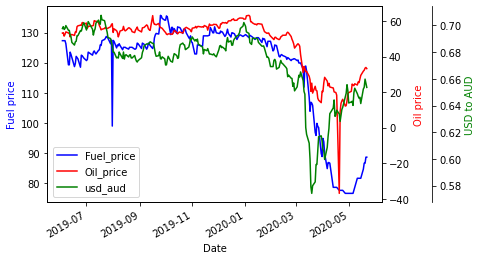

In [281]:
# Let's plot the raw data
ax = df.plot(x="Date", y="Fuel_price", legend=False, color="b")
ax2 = ax.twinx()
df.plot(x="Date", y="Oil_price", ax=ax2, legend=False, color="r")
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.15))
df.plot(x="Date", y="usd_aud", ax=ax3, legend=False, color="g")

ax.set_xlabel("Date")
ax.set_ylabel("Fuel price")
ax2.set_ylabel("Oil price")
ax3.set_ylabel("USD to AUD")

ax.yaxis.label.set_color(color="b")
ax2.yaxis.label.set_color(color="r")
ax3.yaxis.label.set_color(color="g")

ax.figure.legend(bbox_to_anchor=(0.11, 0.2), loc='lower left')
plt.show()

In [282]:
df.to_pickle('data.pkl')
print('Data saved.')

Data saved.
